In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [2]:
# load data from csv
def get_data():
    df = pd.read_csv('ecommerce_data.csv')
    data = df.values # convert to np matrix
    X = data[:,:-1] # get all but last columns
    Y = data[:,-1:] # last column => data[-1:] will give last row instead
    X[:,1] = (X[:,1] - X[:,1].mean())/X[:,1].std() # n products viewed
    X[:,2] = (X[:,2] - X[:,2].mean())/X[:,2].std() # visit duaration
    N, D = X.shape # get current shape of X (N-number of items, D-number of columns)
    X2 = np.zeros((N, D+3)) # create new matrix that has 3 more columns (there are 4 times of the day, so we add 3 columns)
    X2[:,0:(D-1)] = X[:,0:(D-1)] # copy values to new mutrix (all but last time of a day column)
    Z= np.zeros((N, 4)) # create new matrix with n rows and 4 columns
    Z[np.arange(N), X[:,D-1].astype(int)] = 1
    X2[:,-4:] = Z # assign values from Z to last 4 columns in X2
    return X2, Y

In [3]:
# one hot encoded target values
def y2indicator(y, K):
    N = len(y)
    ind = np.zeros((N, K))
    for i in range(N):
        ind[i, y[i]] = 1
    return ind

In [4]:
def softmax(a):
    expA = np.exp(a)
    return expA / expA.sum(axis=1, keepdims=True)

In [5]:
def forward(X, W, b):
    return softmax(X.dot(W) + b)

In [6]:
def predict(P_Y_given_X):
    return np.argmax(P_Y_given_X, axis=1)

In [7]:
# calculate the accuracy
def classification_rate(Y, P):
    return np.mean(Y == P)

In [8]:
def cross_entropy(T, pY):
    return -np.mean(T*np.log(pY))

In [9]:
X, Y = get_data()
X, Y = shuffle(X, Y)

Y = Y.astype(np.int32) # ??
D = X.shape[1] # number of samples
K = len(np.unique(Y)) # number of classes

Xtrain = X[:-100]
Ytrain = Y[:-100]
Xtest = X[-100:]
Ytest = Y[-100:]

D = Xtrain.shape[1]
K = len(np.unique(Ytrain) | np.unique(Ytest))

# convert to indicator
Ytrain_ind = y2indicator(Ytrain, K)
Ytest_ind = y2indicator(Ytest, K)

# randomly initialize weights
W = np.random.randn(D, K)
b = np.zeros(K)

0 0.9614667096855684 1.1080965868728572 0.065
100 0.12025571711590867 0.1068844425360253 0.85
200 0.10561887677754925 0.09329701547690168 0.89
300 0.1000438694202025 0.0898159747240895 0.8925
400 0.09673603738510833 0.08833362483025546 0.8975
500 0.09442004558319311 0.08753570751929987 0.895
600 0.0926627979605152 0.087055573006821 0.8975
700 0.09126571521286653 0.08675529548365735 0.8975
800 0.09011996178504644 0.08657076437981899 0.8975
900 0.0891588952416106 0.0864670643852628 0.9
Final train classification_rate: 0.9
Final test classification_rate: 0.91


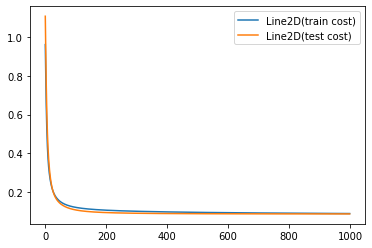

In [10]:
# train loop
train_costs = []
test_costs = []
learning_rate = 0.001
for i in range(1000):
    pYtrain = forward(Xtrain, W, b)
    pYtest = forward(Xtest, W, b)

    ctrain = cross_entropy(Ytrain_ind, pYtrain)
    ctest = cross_entropy(Ytest_ind, pYtest)
    train_costs.append(ctrain)
    test_costs.append(ctest)

    # gradient descent
    W -= learning_rate*Xtrain.T.dot(pYtrain - Ytrain_ind)
    b -= learning_rate*(pYtrain - Ytrain_ind).sum(axis=0)    
    if i % 100 == 0:
        print(i, ctrain, ctest, classification_rate(Ytrain.astype(np.int32).flatten(), predict(pYtrain)))

print("Final train classification_rate:", classification_rate(Ytrain.astype(np.int32).flatten(), predict(pYtrain)))
print("Final test classification_rate:", classification_rate(Ytest.astype(np.int32).flatten(), predict(pYtest)))

legend1, = plt.plot(train_costs, label='train cost')
legend2, = plt.plot(test_costs, label='test cost')
plt.legend([legend1, legend2])
plt.show()